In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\\Users\\sueda\\data\\survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1259.0,7.942815e+07,2.818299e+09,-1726.0,27.0,31.0,36.0,1.000000e+11


In [7]:
df = df.drop(columns = ['Timestamp'])
df = df.drop(columns = ['state'])
df = df.drop(columns = ['comments'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   self_employed              1241 non-null   object
 4   family_history             1259 non-null   object
 5   treatment                  1259 non-null   object
 6   work_interfere             995 non-null    object
 7   no_employees               1259 non-null   object
 8   remote_work                1259 non-null   object
 9   tech_company               1259 non-null   object
 10  benefits                   1259 non-null   object
 11  care_options               1259 non-null   object
 12  wellness_program           1259 non-null   object
 13  seek_help                  1259 non-null   object
 14  anonymit

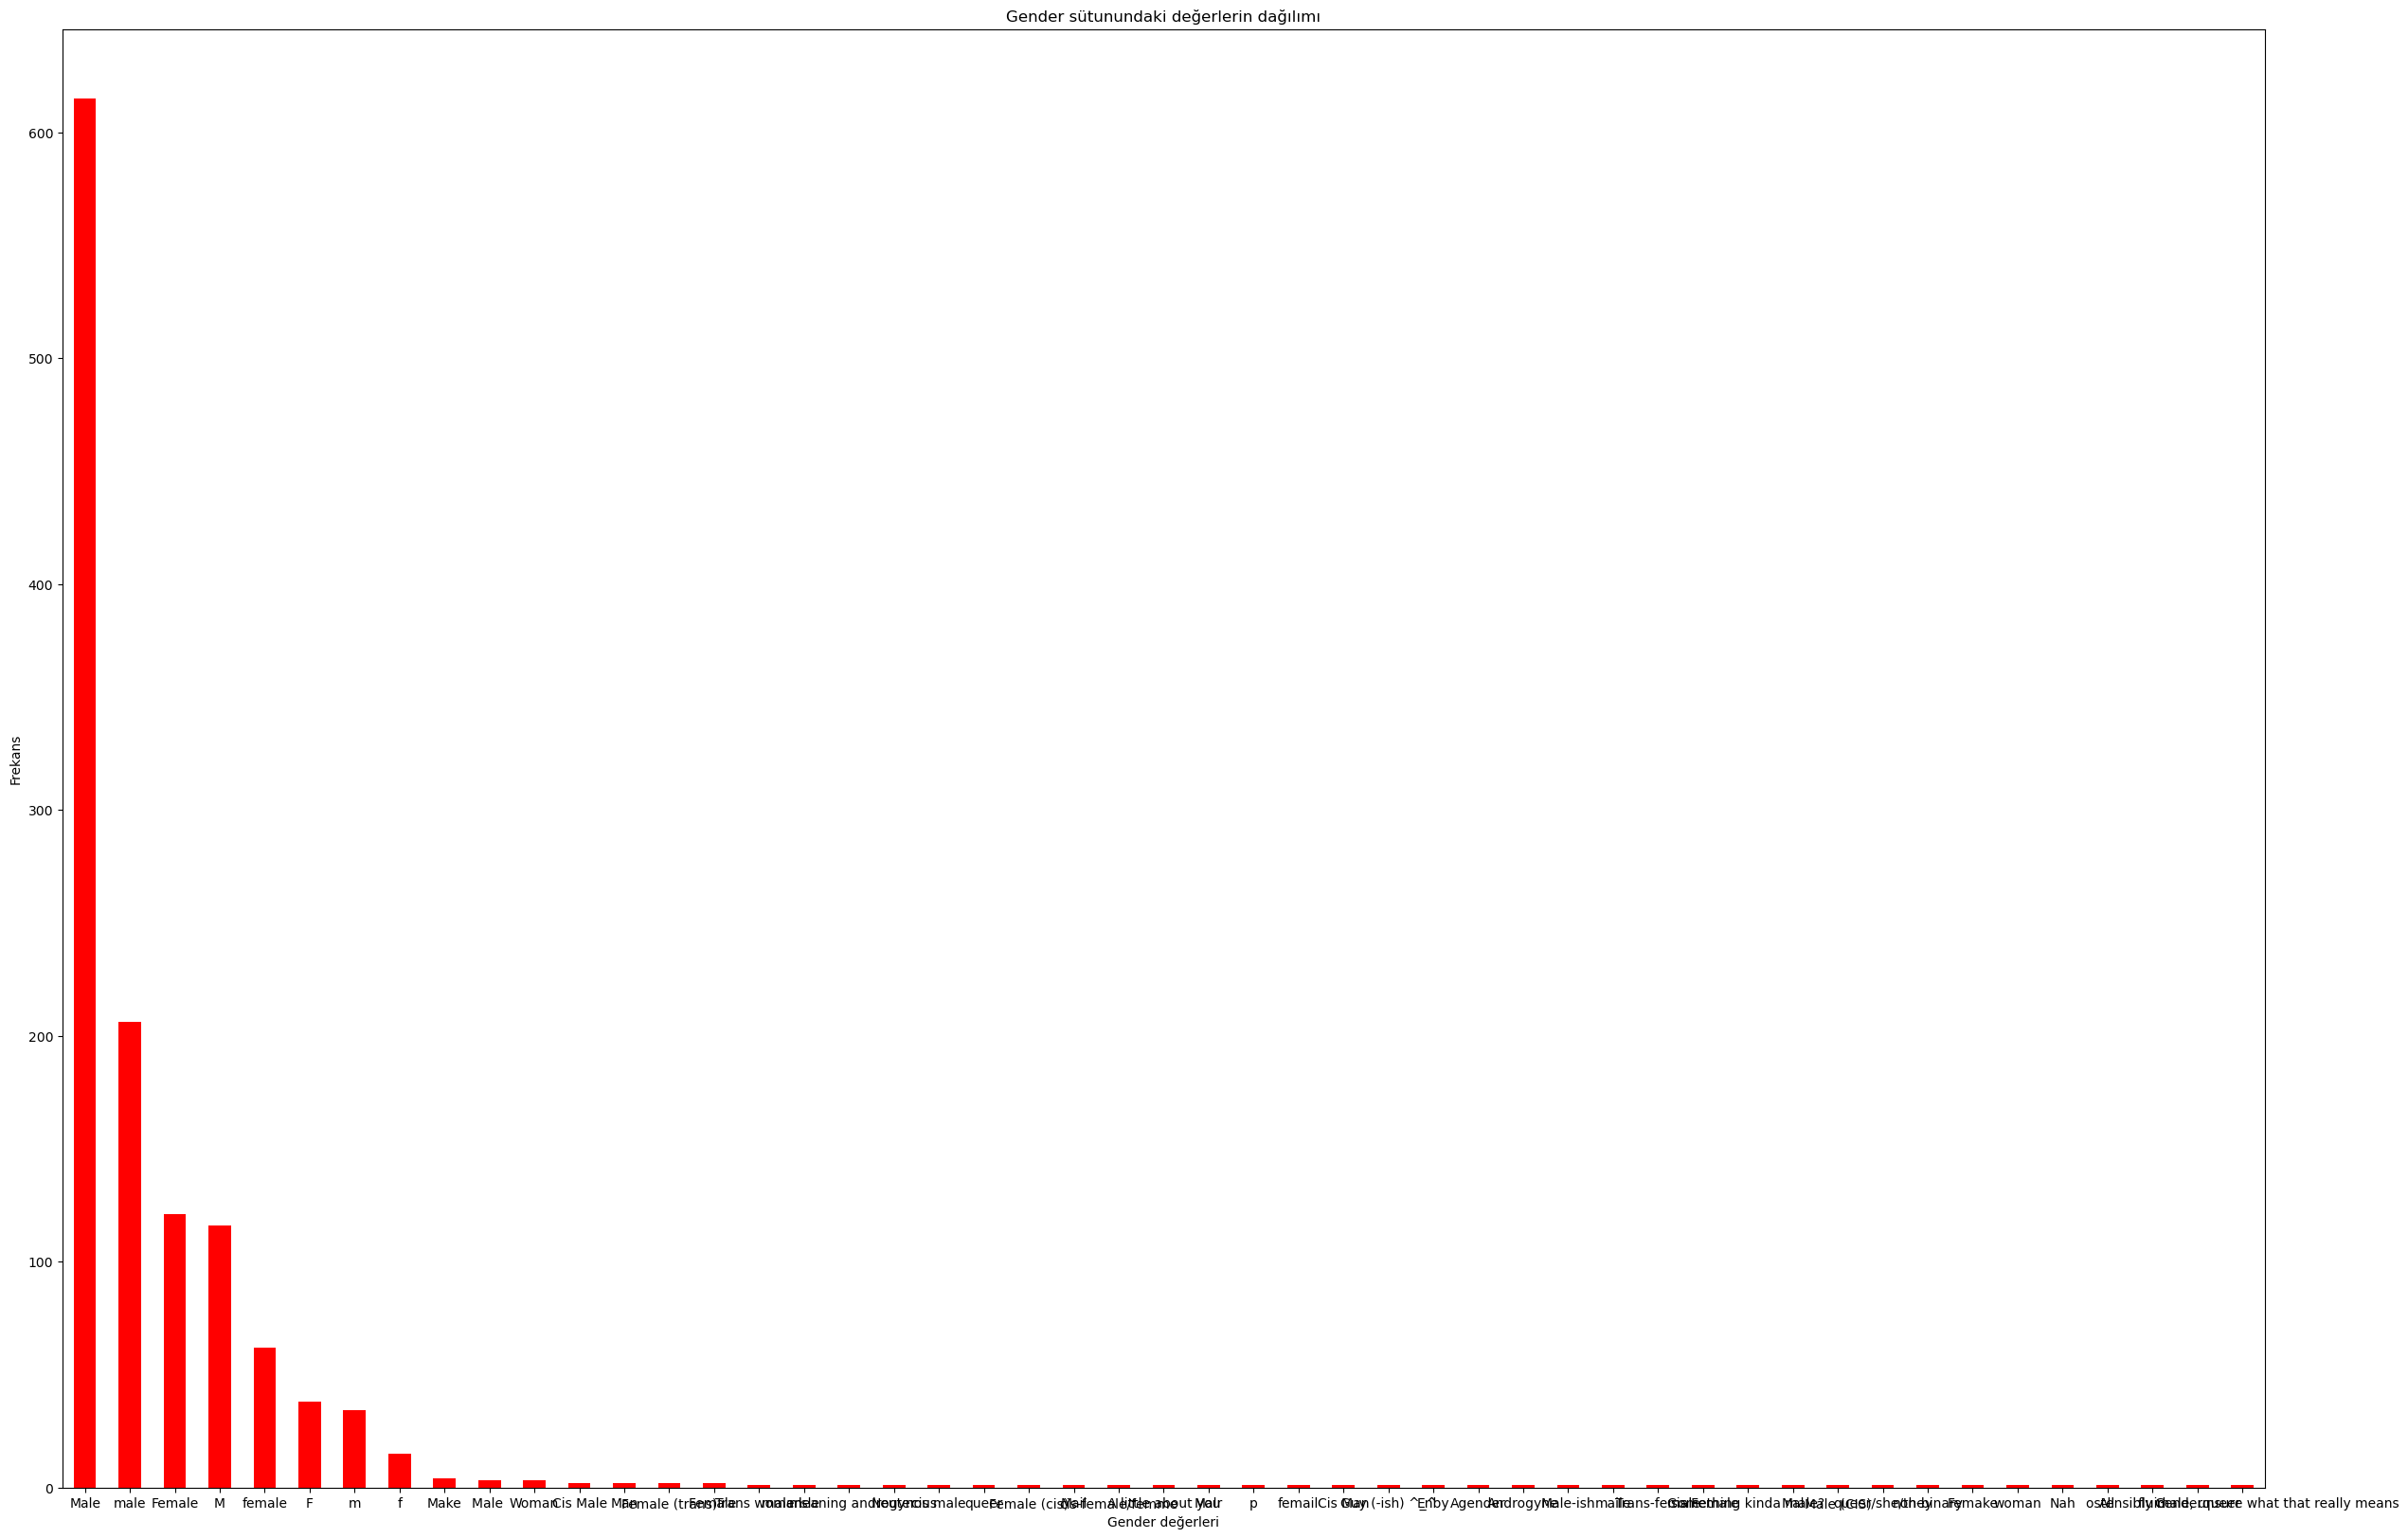

In [9]:
cat_value = df['Gender'].value_counts()  
plt.figure(figsize = (30,20))
cat_value.plot(kind = 'bar', color = 'red')
plt.title('Gender sütunundaki değerlerin dağılımı')
plt.xlabel('Gender değerleri')
plt.ylabel('Frekans')
plt.xticks(rotation = 0)
plt.show()

In [10]:
categorical_values = df['Gender'].unique()
print(f"Gender sütunundaki farklı değerler: {categorical_values}")

Gender sütunundaki farklı değerler: ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [11]:
categorical_values = df['mental_health_consequence'].unique()
print(f"mental_health_consequence sütunundaki farklı değerler: {categorical_values}")

mental_health_consequence sütunundaki farklı değerler: ['No' 'Maybe' 'Yes']


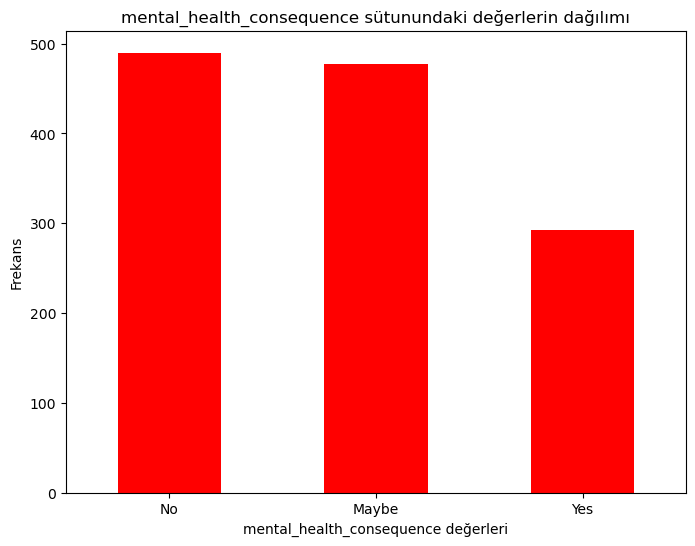

In [12]:
cat_value = df['mental_health_consequence'].value_counts()  
plt.figure(figsize = (8,6))
cat_value.plot(kind = 'bar', color = 'red')
plt.title('mental_health_consequence sütunundaki değerlerin dağılımı')
plt.xlabel('mental_health_consequence değerleri')
plt.ylabel('Frekans')
plt.xticks(rotation = 0)
plt.show()

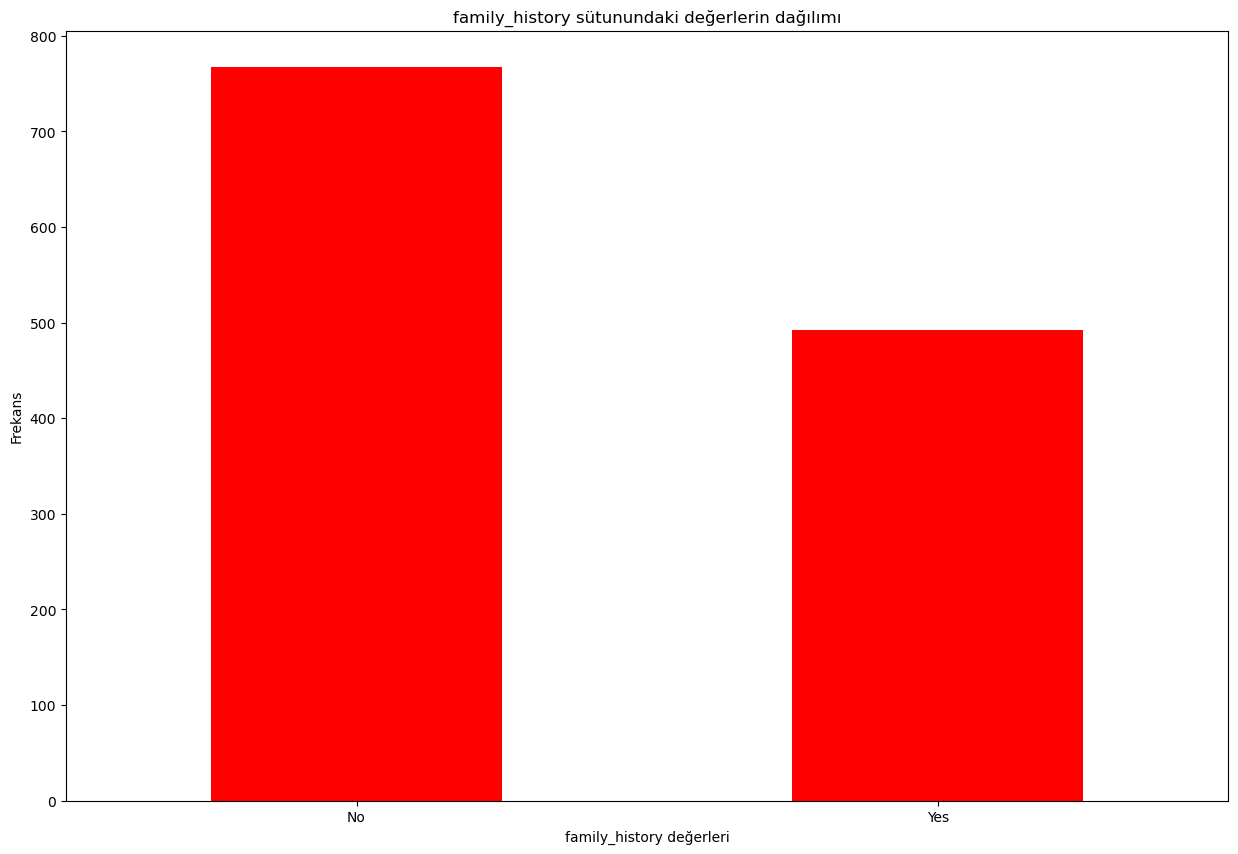

In [13]:
cat_value = df['family_history'].value_counts()  
plt.figure(figsize = (15,10))
cat_value.plot(kind = 'bar', color = 'red')
plt.title('family_history sütunundaki değerlerin dağılımı')
plt.xlabel('family_history değerleri')
plt.ylabel('Frekans')
plt.xticks(rotation = 0)
plt.show()

In [14]:
df.isnull().sum()

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

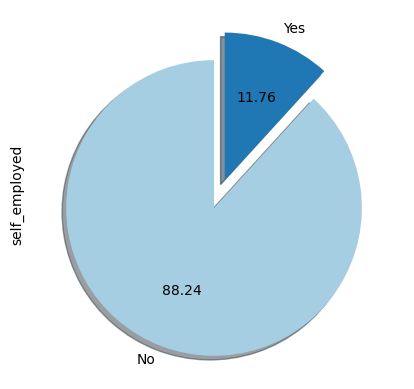

In [15]:
df["self_employed"].value_counts().plot(kind = 'pie', autopct='%.2f',
                              startangle=90,            
                              colors=plt.cm.Paired.colors, 
                              explode=[0.1] * df['self_employed'].nunique(), 
                              shadow=True                 
)
plt.show()

In [16]:
categorical_values = df['self_employed'].unique()
print(f"self_employed sütunundaki farklı değerler: {categorical_values}")

nan_count = df['self_employed'].isna().sum()
print(f"self_employed sütununda {nan_count} tane NaN değeri var.")

self_employed sütunundaki farklı değerler: [nan 'Yes' 'No']
self_employed sütununda 18 tane NaN değeri var.


In [17]:
df["self_employed"] = df["self_employed"].fillna('No')

print(df['self_employed'].value_counts())

# Hala boş değer var mı?
nan_counts = df['self_employed'].isna().sum()
print(f"\n'{nan_counts}' tane NaN değeri kaldı.")

No     1113
Yes     146
Name: self_employed, dtype: int64

'0' tane NaN değeri kaldı.


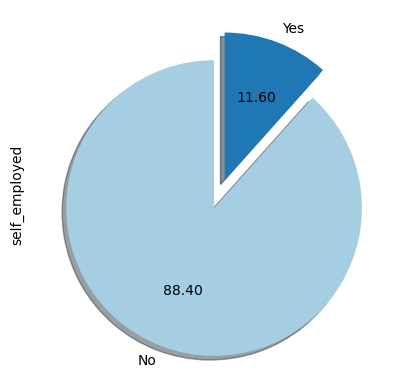

In [18]:
df["self_employed"].value_counts().plot(kind = 'pie', autopct='%.2f',
                              startangle=90,            
                              colors=plt.cm.Paired.colors, 
                              explode=[0.1] * df['self_employed'].nunique(), 
                              shadow=True                 
)
plt.show()

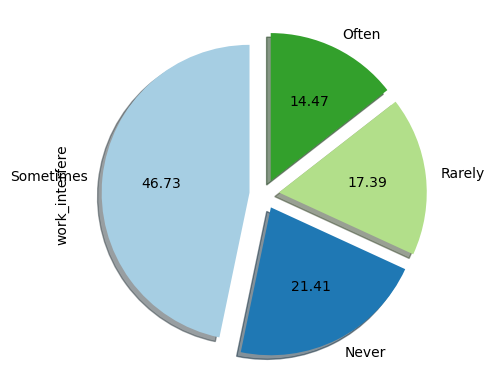

In [19]:
df["work_interfere"].value_counts().plot(kind = 'pie', autopct='%.2f',
                              startangle=90,            
                              colors=plt.cm.Paired.colors, 
                              explode=[0.1] * df['work_interfere'].nunique(), 
                              shadow=True                 
)
plt.show()

In [20]:
categorical_values = df['work_interfere'].unique()
print(f"work_interfere sütunundaki farklı değerler: {categorical_values}")

nan_count = df['work_interfere'].isna().sum()
print(f"work_interfere sütununda {nan_count} tane NaN değeri var.")

work_interfere sütunundaki farklı değerler: ['Often' 'Rarely' 'Never' 'Sometimes' nan]
work_interfere sütununda 264 tane NaN değeri var.


In [21]:
value_counts = df['work_interfere'].value_counts()
print(value_counts)

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64


In [22]:
target_column = 'work_interfere'
categories = ['Sometimes', 'Often', 'Rarely', 'Never']

# Eksik değerleri doldur
nan_count = df[target_column].isna().sum()
values_to_fill = np.random.choice(categories, nan_count)
df.loc[df[target_column].isna(), target_column] = values_to_fill

# Sonuç
print(df[target_column].value_counts())

nan_counts = df['work_interfere'].isna().sum()
print(f"\nwork_interfere sütununda {nan_counts} tane NaN değeri var.")

Sometimes    536
Never        273
Rarely       244
Often        206
Name: work_interfere, dtype: int64

work_interfere sütununda 0 tane NaN değeri var.


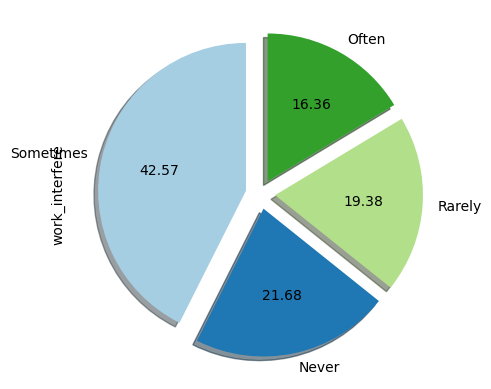

In [23]:
df["work_interfere"].value_counts().plot(kind = 'pie', autopct='%.2f',
                              startangle=90,            
                              colors=plt.cm.Paired.colors, 
                              explode=[0.1] * df['work_interfere'].nunique(), 
                              shadow=True                 
)
plt.show()

In [24]:
df['work_interfere'] = df['work_interfere'].apply(lambda x: 'Poor' if x in ['Often', 'Sometimes'] else 'Good')

print(df['work_interfere'].unique())

['Poor' 'Good']


In [25]:
df["work_interfere"] = df["work_interfere"].replace({'Good':1, 'Poor':0})

print(df['work_interfere'].unique())

[0 1]


In [26]:
df['Gender'] = df['Gender'].str.strip()  # Boşlukları temizleme

# 'Male' olarak sınıflandırılacak değerler
male_labels = [
    'M', 'Male', 'male', 'm', 'Make', 'cis male', 'Cis Male', 'guy (-ish)',
    'Mail', 'Mal', 'maile', 'msle', 'male ', 'cis man', 'Malr', 'Male-ish', 'msl', 'Guy', 'Man','Male (CIS)', 'ostensibly male, unsure what that really means', 'Cis Man', 
    'Guy (-ish) ^_^'
]
df['Gender'] = df['Gender'].replace(male_labels, 'Male')

# 'Female' olarak sınıflandırılacak değerler
female_labels = [
    'F', 'Female', 'female', 'f', 'Cis Female', 'femail', 'woman', 'fem',
    'Trans-female', 'femake', 'femal', 'female ', 'Femake', 'Woman', 'female (cis)', 
    'Femake', 'Female (cis)', 'Fem', 'f', 'p', 'Female (trans)', 'Female (trans)', 'Trans woman', 'cis-female/femme'
]
df['Gender'] = df['Gender'].replace(female_labels, 'Female')

# 'Other' olarak sınıflandırılacak değerler
other_labels = [
    'Trans', 'something kinda male?', 'Androgyn','Androgyne', 'Agender', 'Neuter', 
    'queer', 'All', 'Enby', 'fluid', 'non-binary', 'genderqueer', 'androgyne',
    'nah', 'queer/she/they', 'Genderqueer', 'A little about you', 'Nah', 
    'Other', 'queer', 'Androgynous', 'male leaning androgynous'
]
df['Gender'] = df['Gender'].replace(other_labels, 'Other')

# Sonuçları kontrol edin
print(df['Gender'].unique())



['Female' 'Male' 'Other']


In [27]:
df["Gender"] = df["Gender"].replace({'Female':1, 'Male':0, 'Other': -1})

print(df['Gender'].unique())

[ 1  0 -1]


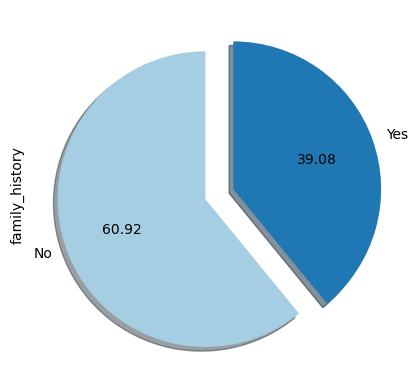

In [28]:
df["family_history"].value_counts().plot(kind = 'pie', autopct='%.2f',
                              startangle=90,            
                              colors=plt.cm.Paired.colors, 
                              explode=[0.1] * df['family_history'].nunique(), 
                              shadow=True                 
)
plt.show()

In [29]:
print(df['family_history'].unique())

df["family_history"] = df["family_history"].replace({'Yes':0, 'No':1})

print(df['family_history'].unique())

['No' 'Yes']
[1 0]


In [30]:
# Aile geçmişi ve tedavi durumunu birleştirerek yeni bir özellik oluşturma
#df['family_treatment'] = df['family_history'].astype(str) + ' - ' + df['treatment'].astype(str)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   int64 
 2   Country                    1259 non-null   object
 3   self_employed              1259 non-null   object
 4   family_history             1259 non-null   int64 
 5   treatment                  1259 non-null   object
 6   work_interfere             1259 non-null   int64 
 7   no_employees               1259 non-null   object
 8   remote_work                1259 non-null   object
 9   tech_company               1259 non-null   object
 10  benefits                   1259 non-null   object
 11  care_options               1259 non-null   object
 12  wellness_program           1259 non-null   object
 13  seek_help                  1259 non-null   object
 14  anonymit

In [32]:
#print(df['family_treatment'].unique())

#df["family_treatment"] = df["family_treatment"].replace({'1 - Yes':3, '1 - No':1, '0 - Yes':2, '0 - No':0})

#print(df['family_treatment'].unique())

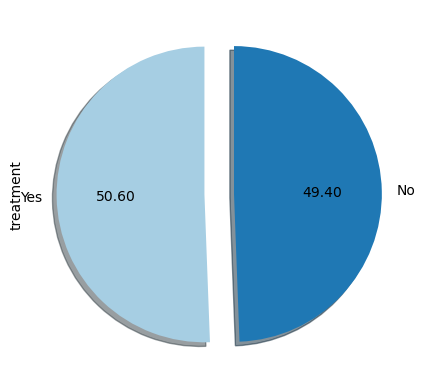

In [33]:
df["treatment"].value_counts().plot(kind = 'pie', autopct='%.2f',
                              startangle=90,            
                              colors=plt.cm.Paired.colors, 
                              explode=[0.1] * df['treatment'].nunique(), 
                              shadow=True                 
)
plt.show()


In [34]:
print(df['treatment'].unique())

df["treatment"] = df["treatment"].replace({'Yes':1, 'No':0})

print(df['treatment'].unique())


['Yes' 'No']
[1 0]


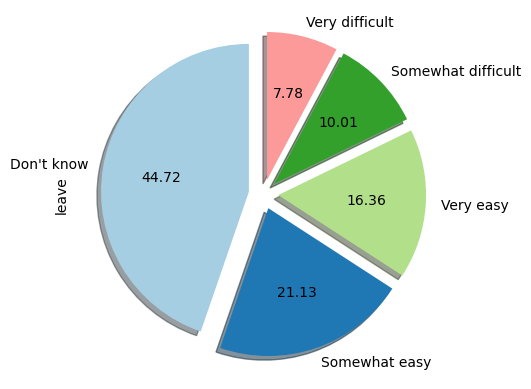

In [35]:
df["leave"].value_counts().plot(kind = 'pie', autopct='%.2f',
                              startangle=90,            
                              colors=plt.cm.Paired.colors, 
                              explode=[0.1] * df['leave'].nunique(), 
                              shadow=True                 
)
plt.show()

In [36]:
print(df['leave'].unique())

df["leave"] = df["leave"].replace({'Very easy':4,'Somewhat easy':3, "Don't know":2, 'Somewhat difficult':1, 'Very difficult':0})

print(df['leave'].unique())

['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']
[3 2 1 0 4]


In [37]:
print(df['no_employees'].unique())

df["no_employees"] = df["no_employees"].replace({'1-5':5, '6-25':4, '26-100':3, '100-500':2, '500-1000':1, 'More than 1000':0})

print(df['no_employees'].unique())

['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']
[4 0 3 2 5 1]


In [38]:
print(df['remote_work'].unique())

df["remote_work"] = df["remote_work"].replace({'Yes':1, 'No':0})

print(df['remote_work'].unique())


['No' 'Yes']
[0 1]


In [39]:
print(df['tech_company'].unique())

df["tech_company"] = df["tech_company"].replace({'Yes':1, 'No':0})

print(df['tech_company'].unique())

['Yes' 'No']
[1 0]


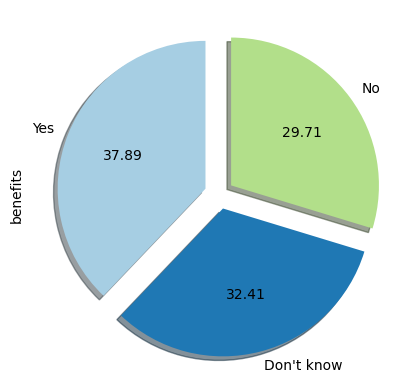

In [40]:
df["benefits"].value_counts().plot(kind = 'pie', autopct='%.2f',
                              startangle=90,            
                              colors=plt.cm.Paired.colors, 
                              explode=[0.1] * df['benefits'].nunique(), 
                              shadow=True                 
)
plt.show()

In [41]:
print(df['benefits'].unique())

df["benefits"] = df["benefits"].replace({'Yes':1, 'No':-1, "Don't know":0})

print(df['benefits'].unique())

['Yes' "Don't know" 'No']
[ 1  0 -1]


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   int64 
 2   Country                    1259 non-null   object
 3   self_employed              1259 non-null   object
 4   family_history             1259 non-null   int64 
 5   treatment                  1259 non-null   int64 
 6   work_interfere             1259 non-null   int64 
 7   no_employees               1259 non-null   int64 
 8   remote_work                1259 non-null   int64 
 9   tech_company               1259 non-null   int64 
 10  benefits                   1259 non-null   int64 
 11  care_options               1259 non-null   object
 12  wellness_program           1259 non-null   object
 13  seek_help                  1259 non-null   object
 14  anonymit

In [43]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = df.select_dtypes(include = ['int64', 'float64']).columns

scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [44]:
print(numeric_columns)

Index(['Age', 'Gender', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits', 'leave'],
      dtype='object')


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1259 non-null   float64
 1   Gender                     1259 non-null   float64
 2   Country                    1259 non-null   object 
 3   self_employed              1259 non-null   object 
 4   family_history             1259 non-null   float64
 5   treatment                  1259 non-null   float64
 6   work_interfere             1259 non-null   float64
 7   no_employees               1259 non-null   float64
 8   remote_work                1259 non-null   float64
 9   tech_company               1259 non-null   float64
 10  benefits                   1259 non-null   float64
 11  care_options               1259 non-null   object 
 12  wellness_program           1259 non-null   object 
 13  seek_help                  1259 non-null   objec

In [46]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score

X = df[numeric_columns].drop(columns = ['treatment'])
y = df['treatment']


In [47]:
from sklearn.preprocessing import PolynomialFeatures

# Polinom özellikler türetme (derece 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[numeric_columns])

# Polinom özellikleri veri kümesine ekleme
df_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(numeric_columns))
df = pd.concat([df.reset_index(drop=True), df_poly], axis=1)



In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Özellik seçimi için RFE kullanımı
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=10, step=1)
rfe_selector = rfe_selector.fit(X, y)

# Seçilen özellikleri veri kümesinde tutma
selected_features = X.columns[rfe_selector.support_]
df = df[selected_features]

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1259 non-null   float64
 1   Gender          1259 non-null   float64
 2   family_history  1259 non-null   float64
 3   work_interfere  1259 non-null   float64
 4   no_employees    1259 non-null   float64
 5   remote_work     1259 non-null   float64
 6   tech_company    1259 non-null   float64
 7   benefits        1259 non-null   float64
 8   leave           1259 non-null   float64
dtypes: float64(9)
memory usage: 88.6 KB


In [50]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1259 entries, 0 to 1258
Series name: treatment
Non-Null Count  Dtype  
--------------  -----  
1259 non-null   float64
dtypes: float64(1)
memory usage: 10.0 KB


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

In [52]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 45)

rf_model.fit(X_train, y_train)

#cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

y_pred = rf_model.predict(X_test)


print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

              precision    recall  f1-score   support

         0.0       0.68      0.67      0.67       126
         1.0       0.67      0.69      0.68       126

    accuracy                           0.68       252
   macro avg       0.68      0.68      0.68       252
weighted avg       0.68      0.68      0.68       252

Accuracy: 0.68
Precision: 0.67
Recall: 0.69
F1-Score: 0.68
Confusion Matrix:
[[84 42]
 [39 87]]


In [53]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by = 'Importance', ascending = False))

          Feature  Importance
4    no_employees    0.207322
8           leave    0.179362
2  family_history    0.168833
3  work_interfere    0.143221
7        benefits    0.124947
1          Gender    0.075434
5     remote_work    0.055192
6    tech_company    0.045571
0             Age    0.000118


In [54]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter = 1000)
lr_model.fit(X_train, y_train)

cv_scores = cross_val_score(lr_model, X_train, y_train, cv=25, scoring='accuracy')

y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

lr_cv = cv_scores.mean()
print(f'Mean CV Accuracy: {lr_cv}')

Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.70      0.68       126
         1.0       0.68      0.63      0.66       126

    accuracy                           0.67       252
   macro avg       0.67      0.67      0.67       252
weighted avg       0.67      0.67      0.67       252

Mean CV Accuracy: 0.7200731707317073


In [55]:
from sklearn.neural_network import MLPClassifier

ann_model = MLPClassifier(hidden_layer_sizes = (10,), max_iter = 100, random_state = 40)

ann_model.fit(X_train, y_train)

ann_cv_scores = cross_val_score(ann_model, X_train, y_train, cv=25, scoring='accuracy')

y_pred = ann_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

ann_cv = ann_cv_scores.mean()
print(f'ANN Mean CV Accuracy: {ann_cv}')

Accuracy: 0.6626984126984127
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.69      0.67       126
         1.0       0.67      0.63      0.65       126

    accuracy                           0.66       252
   macro avg       0.66      0.66      0.66       252
weighted avg       0.66      0.66      0.66       252

ANN Mean CV Accuracy: 0.7101219512195123


In [56]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=45)
xgb_model.fit(X_train, y_train)

xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=20, scoring='accuracy')

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

xgb_cv = xgb_cv_scores.mean()
print(f'XGBoost Mean CV Accuracy: {xgb_cv}')

Accuracy: 0.6587301587301587
Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.66      0.66       126
         1.0       0.66      0.66      0.66       126

    accuracy                           0.66       252
   macro avg       0.66      0.66      0.66       252
weighted avg       0.66      0.66      0.66       252

XGBoost Mean CV Accuracy: 0.6844117647058823


In [57]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=45)
lgbm_model.fit(X_train, y_train)

lgbm_cv_scores = cross_val_score(lgbm_model, X_train, y_train, cv=25, scoring='accuracy')

y_pred = lgbm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


[LightGBM] [Info] Number of positive: 511, number of negative: 496
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 65
[LightGBM] [Info] Number of data points in the train set: 1007, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507448 -> initscore=0.029794
[LightGBM] [Info] Start training from score 0.029794
[LightGBM] [Info] Number of positive: 490, number of negative: 476
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 65
[LightGBM] [Info] Number of data points in the train set: 966, number of used features: 9
[LightGBM] [Info] [binary:BoostFromSc

In [58]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

lgb_cv = lgbm_cv_scores.mean()
print(f'LightGBM Mean CV Accuracy: {lgb_cv}')

Accuracy: 0.6468253968253969
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.63      0.64       126
         1.0       0.64      0.66      0.65       126

    accuracy                           0.65       252
   macro avg       0.65      0.65      0.65       252
weighted avg       0.65      0.65      0.65       252

LightGBM Mean CV Accuracy: 0.6912926829268293


In [59]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(verbose=0, random_state=45)
catboost_model.fit(X_train, y_train)

catboost_cv_scores = cross_val_score(catboost_model, X_train, y_train, cv=25, scoring='accuracy')

y_pred = catboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [60]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

cat_cv = catboost_cv_scores.mean()
print(f'CatBoost Mean CV Accuracy: {cat_cv}')

Accuracy: 0.6746031746031746
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67       126
         1.0       0.67      0.67      0.67       126

    accuracy                           0.67       252
   macro avg       0.67      0.67      0.67       252
weighted avg       0.67      0.67      0.67       252

CatBoost Mean CV Accuracy: 0.7241951219512195


In [61]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('random forest', rf_model),
    #('xgboost', xgb_model),
    #('lightgbm', lgbm_model),
    ('logistic', lr_model),
    ('ann', ann_model),
    ('catboost', catboost_model)],
    voting='soft')

ensemble_model.fit(X_train, y_train)

ensemble_cv_scores = cross_val_score(ensemble_model, X_train, y_train, cv=10, scoring='accuracy')

y_pred = ensemble_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [62]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

ensemble_cv = ensemble_cv_scores.mean()
print(f'Ensemble Mean CV Accuracy: {ensemble_cv}')

Accuracy: 0.6746031746031746
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.68      0.68       126
         1.0       0.68      0.67      0.67       126

    accuracy                           0.67       252
   macro avg       0.67      0.67      0.67       252
weighted avg       0.67      0.67      0.67       252

Ensemble Mean CV Accuracy: 0.7239207920792079


In [63]:
metrics = {
    'Model': ['Ensemble', 'XGBoost', 'CatBoost', 'LightGBM','ANN', 'RF','LR'],
    'Accuracy': [ensemble_cv, xgb_cv, cat_cv, lgb_cv, ann_cv, lr_cv, accuracy],
}

metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy
0,Ensemble,0.723921
1,XGBoost,0.684412
2,CatBoost,0.724195
3,LightGBM,0.691293
4,ANN,0.710122
5,RF,0.720073
6,LR,0.674603
